IA & Data science (LU3IN0226) -- 2019-2020
--------
*&copy; Equipe pédagogique: Gauvain Bourgne, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME04: les $k$-plus proches voisins (*$k$-ppv* ou *$k$-NN*)

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-04</tt> et rajouter à la suite de <tt>tme-04</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `tme-04-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

<font color="RED" size="+1">**[Q]**</font> **Mise à jour de la librairie `iads`**

En premier lieu, vérifier que votre librairie `iads` est bien à jour : elle doit maintenant contenir toutes les fonctions et classes que mises au point et testées dans le tme-03. Une fois à jour, importer la librairie pour pouvoir l'utiliser dans ce notebook.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut


### Objectifs de ce TME

L'objectif de ce TME est de programmer l'algorithme des $k$ plus proches voisins (aussi appelé `k-nn` pour *$k$ nearest neighbors*).

En reprenant la fonction écrite dans les TME précédents, on commence par générer un petit dataset qui permettra de tester les fonctions.

Le dataset généré contient  20 lignes de  2 colonnes.


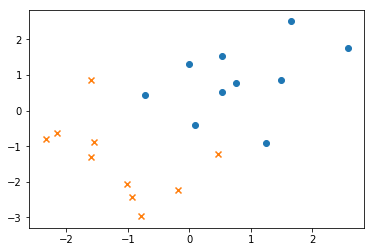

In [2]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Exemple d'utilisation:

data_desc, data_label = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

print("Le dataset généré contient ", np.shape(data_desc)[0], "lignes de ", np.shape(data_desc)[1], "colonnes.")

# Affichage :
ut.plot2DSet(data_desc,data_label)


### Tri de valeurs
Dans ce qui suit, il sera nécessaire de réaliser un tri des distances calculées, on utilise pour cela la méthode `numpy.argsort`. Consulter la documentation pour voir comment utiliser cette fonction.

Exemple d'utilisation de `numpy.argsort`:

In [3]:
liste = np.array([100, 50, 25, 7, 65, 42, 3, 99, 32])
liste

array([100,  50,  25,   7,  65,  42,   3,  99,  32])

In [4]:
indices_tri = np.argsort(liste)
indices_tri

array([6, 3, 2, 8, 5, 1, 4, 7, 0], dtype=int64)

In [5]:
liste_triee = liste[indices_tri]
liste_triee

array([  3,   7,  25,  32,  42,  50,  65,  99, 100])

In [6]:
liste_triee[0:4].sum()

67

## L'algorithme  k-NN

De la même façon que les classifieurs ont été définis dans les tme précédents, le classifieur par $k$ plus proches voisins (ou k-NN) est défini comme suit. 

Description de la classe `ClassifierKNN` (qui étend `Classifier`):
- dans le constructeur, on précise, en plus de la dimension du dataset, le nombre de voisins à utiliser (valeur de $k$)
- dans la méthode `train`, on donne le dataset qui doit servir de base de référence
- dans la méthode `score`, pour une description d'exemple $x$ donnée :
    - 1) on construit le tableau des distances entre $x$ et les exemples du dataset de référence, 
    - 2) on trie ce tableau grâce à la méthode `numpy.argsort`,
    - 3) le score qui doit être rendu est alors **la proportion de classe +1** parmi les $k$ plus proches voisins de $x$. Ce score est donc un nombre réel de $[0,1]$ qui vaut $0.0$ si tous les $k$ voisins de $x$ sont de la classe $-1$ et qui vaut $1.0$ si tous les $k$ voisins de $x$ sont de laclasse $+1$. <br/> Par conséquent, si $k$ vaut $1$ (on ne regarde que le plus proche voisin), la méthode `score` rend donc soit $0.0$ soit $1.0$ selon la classe de ce voisin.
- dans la méthode `predict`, pour une description d'exemple $x$ donnée, on utilise le score rendu par la fonction précédente pour rendre la classe de l'exemple, c'est-à-dire soit $-1$ soit $+1$. 


<font color="RED" size="+1">**[Q]**</font> Donner l'implémentation de la classe `ClassifierKNN` qui hérite de la classe `Classifier` et permet de définir un classifieur k-NN.

In [7]:
# ------------------------ A COMPLETER :

class ClassifierKNN(cl.Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    #TODO: A Compléter
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        cl.Classifier.__init__(self, input_dimension)
        self.k = k
        
    def distance(self, x):
        return np.array([np.linalg.norm(x - y) for y in self.desc_set])
        
        
    def sim(self, x):
        return np.array([np.exp(-((np.linalg.norm(x - y)**2)/(2.0* (np.var(self.desc_set)**2) ))) for y in self.desc_set])
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        dist = self.distance(x)
#         print(dist)
        indices = np.argsort(dist)
#         print(indices[:self.k])
#         print(self.label_set[indices[:self.k]])
        nearest = self.label_set[indices[:self.k]]
#         print(nearest)
        ones = nearest[nearest == 1]
        return np.float(len(ones)/self.k)
    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        if self.score(x) >= 0.5:
            return +1
        return  -1

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set

Classification de l'exemple  [-2 -2] : 1  (score=  1.0 )
Classification de l'exemple  [ 0.  -0.1] : -1  (score=  0.0 )
Classification de l'exemple  [0.25 1.  ] : -1  (score=  0.0 )
Classification de l'exemple  [2 2] : -1  (score=  0.0 )


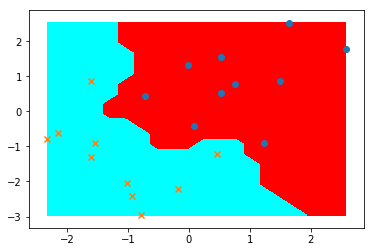

In [8]:
# Exemple d'utilisation :
knn = ClassifierKNN(2,1)
knn.train(data_desc, data_label)

exemple = np.array([-2,-2])
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")
exemple = np.array([0,-0.1])
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")
exemple = np.array([0.25,1])
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")
exemple = np.array([2,2])
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")

ut.plot_frontiere(data_desc,data_label,knn,20)
ut.plot2DSet(data_desc,data_label)


Classification de l'exemple  [-2 -2] : 1  (score=  1.0 )
Classification de l'exemple  [ 0.  -0.1] : -1  (score=  0.0 )
Classification de l'exemple  [0.25 1.  ] : -1  (score=  0.0 )
Classification de l'exemple  [2 2] : -1  (score=  0.0 )


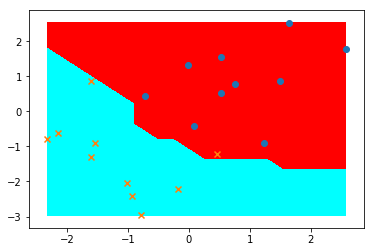

In [9]:
# Un autre exemple d'utilisation :
knn = ClassifierKNN(2,3)
knn.train(data_desc, data_label)

exemple = np.array([-2,-2])
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")
exemple = np.array([0,-0.1])
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")
exemple = np.array([0.25,1])
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")
exemple = np.array([2,2])
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")

ut.plot_frontiere(data_desc,data_label,knn,20)
ut.plot2DSet(data_desc,data_label)


Classification de l'exemple  [1, 0.0] : 1  (score=  0.6666666666666666 )
Classification de l'exemple  [-1.28425, 0.2521] : -1  (score=  0.3333333333333333 )


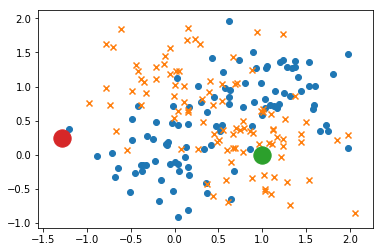

In [10]:
data_desc, data_label = ut.create_XOR(50, 0.21)
ut.plot2DSet(data_desc, data_label)
exemple = [1, 0.0]
plt.scatter(exemple[0], exemple[1], s=300)
knn = ClassifierKNN(2, 3)
knn.train(data_desc, data_label)
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")



knn = ClassifierKNN(2, 3)
knn.train(data_desc, data_label)

exemple = [-1.28425, 0.2521]
print("Classification de l'exemple ",exemple, ":", knn.predict(exemple), " (score= ", knn.score(exemple),")")
plt.scatter(exemple[0], exemple[1], s=300)

## Expérimentations

Pour expérimenter un classifieur, il est nécessaire de posséder deux datasets distincts: 
- le dataset d'apprentissage, qui se compose donc de 2 arrays: `train_desc` et `train_labels`
- et le dataset de test, qui se compose de 2 arrays: `test_desc` et `test_labels`. 


On commence par construire le classifieur avec le dataset d'apprentisage, puis, on évalue sa performance en 2 temps :
- on calcule son **accuracy d'apprentissage** qui est l'accuracy obtenue sur le dataset d'apprentissage 
- on calcule son **accuracy de test** qui est l'accuracy obtenue sur le dataset de test

La première valeur mesure combien le classifieur a surappris les données d'apprentissage, la deuxième valeur mesure sa performance en généralisation.

### Différentes expérimentations sur des datasets générés

<font color="RED" size="+1">**[Q]**</font> Comparer la performance (en train et test) de plusieurs classifieurs KNN construits avec différentes valeurs de $k$. Que pouvez vous constater ?
Tracer la performance (accuracy d'apprentissage et de test) en fonction de la valeur de $k$ et essayer avec différentes façons de générer les dataset (gaussiennes).

[0, 80.0, 77.5, 75.0, 73.75]
[0, 62.5, 63.74999999999999, 65.0, 65.0]


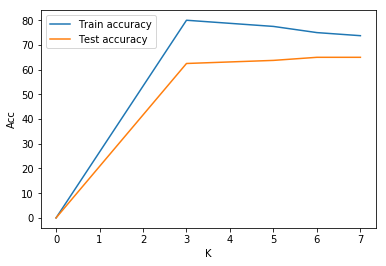

In [11]:
# ------------------------ A COMPLETER :
acc_train = [0]
acc_test = [0]
train_desc, labels_train = ut.create_XOR(20, 0.25652)
test_desc, labels_test = ut.create_XOR(20, 0.25)
knns = []
# ut.plot2DSet(train_desc, labels_train)
# plt.show()
# ut.plot2DSet(test_desc, labels_test)
for k in [3,5,6, 7]:
    knn = ClassifierKNN(2, k)
    knns.append(knn)
    knn.train(train_desc, labels_train)
    acc_train.append(knn.accuracy(train_desc, labels_train))

acc_test = [0]
for knn in knns:
    acc_test.append(knn.accuracy(test_desc, labels_test))
        
print(acc_train)
print(acc_test)

plt.plot([0, 3, 5, 6, 7], acc_train, label="Train accuracy")
plt.plot([0, 3, 5, 6, 7], acc_test, label="Test accuracy")
plt.xlabel("K")
plt.ylabel("Acc")
plt.legend()

Les accuracies d'apprentissage et de test offrent une bonne évaluation du classifieur, mais souvent il est intéressant d'avoir aussi une mesure de la robustesse de ces accuracies ainsi obtenues: c'est-à-dire combien elles sont fiables.

C'est un peu comme si on souhaitait comparer 2 étudiants qui ont obtenu 12 de moyenne (sur 20) sur leur 4 premières interrogations. La seule valeur de la moyenne ne donne pas beaucoup d'information sur la note que pourrait obtenir chacun de ces étudiants lors d'une prochaine interrogation. Pour avoir plus d'information, on doit regarder leurs notes: 
- le premier étudiant a eu les 4 notes suivantes : 12, 11, 13 et 12;
- le secont étudiant a eu les 4 notes suivantes : 20, 4, 20, 4.

Ainsi, ces 2 étudiants ont tous les deux 12 de moyenne, mais on peut remarquer que le premier est "plus stable" que le second. Une mesure classique pour rendre compte de cela est l'*écart type* de la série des notes:
- le premier étudiant a une moyenne de 12 avec un écart type de 0.8;
- le second étudiant a une moyenne de 12 avec un écart type de 9.2.

Pour évaluer un classifieur, on va donc mesurer son accuracy sur plusieurs datasets et calculer la moyenne des valeurs obtenues ainsi que leur écart type pour avoir une information sur sa robustesse de prédiction.

Pour cela, on réalise alors une expérimentation par validation croisée (ou *cross-validation*) dont le principe est le suivant.

<ol>
    <li>Choisir un algorithme de construction de classifieur à évaluer</li>
    <li>Générer un dataset suffisamment grand. Soit $DS$ ce dataset</li>
    <li>Découper $DS$ en 10 datasets de taille égale tels qu'ils contiennent tous la même proportion d'exemples de chaque classe que $DS$, les exemples pour constituer chacun de ces datasets sont tirés aléatoirement parmi les exemples $DS$ par un tirage *sans remise*. On appelle $DS0$, $DS1$,..., $DS9$ ces 10 datasets.</li>
    <li>Construire un classifieur en prenant $DS0$ comme dataset d'apprentissage et en regroupant les 9 autres datasets $DS1$,...,$DS9$ pour constituer un dataset de test et évaluer l'accuracy d'apprentissage $accA_0$ et l'accuracy de test $accT_0$ de ce classifieur.</li>
    <li>Construire un nouveau classifier en prenant $DS1$ comme dataset d'apprentissage et les autres datasets $DS0$, $DS3$,...,$DS9$ comme dataset de test et évaluer l'accuracy d'apprentissage $accA_1$ et l'accuracy de test $accT_1$ de ce classifieur.</li>
    <li>etc. Chaque dataset $DSi$ sert une fois comme dataset d'apprentissage et 9 fois comme dataset de test</li>
</ol>
    
Au final, on obtient donc 10 valeurs d'accuracy d'apprentissage et 10 valeurs d'accuracy de test, la performance globale de l'algorithme du classifieur choisi est obtenue en donnant:
- la moyenne des accuracies de test $\frac{1}{10}\sum_{i=0}^{9} accT_i$
- l'écart type des accuracies de test $accT_0$, ..., $accT_{9}$

De même, la moyenne et l'écart type des accuracies d'apprentissage peut être aussi fournie.

*Remarque*: ici, comme on choisit de découper $DS$ en $10$ datasets, on parle de *validation croisée en 10 paquets* (en anglais: *10-folds cross-validation*). Dans d'autres cas, on peut choisir de réaliser un découpage avec un nombre de datasets différents. On parle alors de *validation croisée en m paquets* avec $m$ un nombre entier supérieur ou égal à 2.


<font color="RED" size="+1">**[Q]**</font> Compléter la fonction suivante qui, étant donné un classifieur $C$, un dataset $DS$ (donné sous la forme d'un tuple (descriptions, labels)) et un entier $m$, réalise une validation croisée en $m$ paquets et rend le quadruplet composé de 2 tuples: le premier tuple donne la moyenne et l'écart type d'apprentissage, le second tuple donne la moyenne et l'écart type de test.

In [42]:
def crossvalidation(classifier, data, labels, k=10):
    """
        train on one,  test on the rest
    
    """

    size = len(data) // k
    data_copy = list(data)
    labels_copy = list(labels)
    data_indices = []
    labels_indices = []
    for _ in range(k):
        fold_data = []
        fold_labels = []
        for _ in range(size):
            index = np.random.randint(len(data_copy))
            data_copy.pop(index)
            labels_copy.pop(index)
            fold_data.append(index)
            fold_labels.append(index)
        data_indices.append(fold_data)
        labels_indices.append(fold_labels)
    train_acc = [0]
    test_acc = [0]
    for i in range(k):
        train_data = data[data_indices[i]]
        train_label = labels[labels_indices[i]]
        test_data = []
        test_labels = []
        for x, y in zip(data_indices, labels_indices):
            if np.all(x != data_indices[i]) and np.all(labels[y] != labels_indices[i]) :
                test_data.append(data[x])
                test_labels.append(labels[y])
        test_data = np.array(test_data)    
        test_labels = np.array(test_labels)
       
        test_data = np.vstack(test_data)
        test_labels = np.hstack(test_labels)
#       print(test_data, test_labels)
#       print("--------------------")
#       print(train_data, train_label)
        classifier.train(train_data, train_label)
        train_acc.append(classifier.accuracy(train_data, train_label))
        test_acc.append(classifier.accuracy(test_data, test_labels))
       
    return (np.mean(train_acc), np.std(train_acc)),(np.mean(test_acc), np.std(test_acc))    
      


In [43]:
crossvalidation(ClassifierKNN(2,3), (data_desc, data_label))

((83.0, 9.0), (69.55555555555557, 7.600357366516751))

In [44]:
# Exemple d'utilisation:

# Un autre exemple d'utilisation :
knn = ClassifierKNN(2,1)

res_apprentissage, res_test = crossvalidation(knn, (data_desc, data_label), 10)

print("(moyenne, std) pour apprentissage :", res_apprentissage)
print("(moyenne, std) pour test          :", res_test)

(moyenne, std) pour apprentissage : (100.0, 0.0)
(moyenne, std) pour test          : (67.38888888888889, 5.0555555555555545)


Le dataset généré contient  400 lignes de  2 colonnes.
(moyenne, std) pour apprentissage : (95.25, 2.4238399287081647)
(moyenne, std) pour test          : (90.5625, 0.30618621784789724)


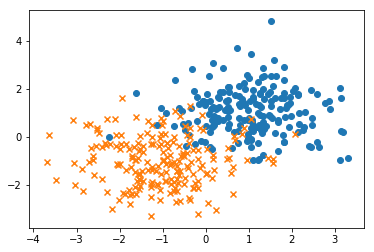

In [45]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Un autre exemple d'utilisation:

autre_desc, autre_label = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),200)

print("Le dataset généré contient ", np.shape(autre_desc)[0], "lignes de ", np.shape(autre_desc)[1], "colonnes.")

# Affichage :
ut.plot2DSet(autre_desc,autre_label)

# Classifieur :
knn = ClassifierKNN(2,3)

res_apprentissage, res_test = crossvalidation(knn, (autre_desc, autre_label), 5)

print("(moyenne, std) pour apprentissage :", res_apprentissage)
print("(moyenne, std) pour test          :", res_test)

Lorsqu'on compare plusieurs classifieurs, il est intéressant de mesurer leurs performances par une validation croisée, et idéalement, réalisée avec les mêmes datasets.

<font color="RED" size="+1">**[Q]**</font> Réécrire la fonction précédente pour qu'elle prenne en argument non pas un seul classifieur, mais une liste de classifieurs et qu'elle renvoie la liste des quadruplets résultats correspondante.

*Attention*: il ne s'agit pas d'écrire une fonction qui appelle la fonction précédente, il faut la réécrire.

In [46]:
# ------------------------ A COMPLETER :
def crossvalidation_(LC, DS, m):
    """ List[Classifieur] * tuple[array, array] * int ->  List[tuple[tuple[float,float], tuple[float,float]]]
        Hypothèse: m>0
        Par défaut, m vaut 10
    """
#     print("Il y a ", len(LC), "classifieurs à comparer.")
    result = []
    for C in LC:
        result.append(crossvalidation(C, DS, m))
    return result
        
    


In [47]:
# Exemple d'utilisation:

# Un autre exemple d'utilisation :
Liste_knns = []
Liste_knns.append(ClassifierKNN(2,1))
Liste_knns.append(ClassifierKNN(2,3))
Liste_knns.append(ClassifierKNN(2,5))

Resultats = crossvalidation_(Liste_knns, (autre_desc, autre_label), 10)

print("\n*****\nAffichage des résultats:")
for k in range(0,len(Resultats)):
    print("Classifieur ", k)
    print("\t(moyenne, std) pour apprentissage :", Resultats[k][0])
    print("\t(moyenne, std) pour test          :", Resultats[k][1])



*****
Affichage des résultats:
Classifieur  0
	(moyenne, std) pour apprentissage : (100.0, 0.0)
	(moyenne, std) pour test          : (89.72222222222221, 2.7971546389275797)
Classifieur  1
	(moyenne, std) pour apprentissage : (93.75, 3.2113081446662823)
	(moyenne, std) pour test          : (91.08333333333334, 0.6854979266251696)
Classifieur  2
	(moyenne, std) pour apprentissage : (93.0, 3.840572873934304)
	(moyenne, std) pour test          : (91.58333333333333, 1.4753635249877208)


<font color="RED" size="+1">**[Q]**</font> A l'aide d'une validation croisée en 10 paquets réalisée sur un dataset généré aléatoirement, donner les performances (accuracy moyenne et écart type) de tous les classifieurs implémentés depuis le TME 2.

In [ ]:
# ------------------------ A COMPLETER :
# easy to do 


### Expérimentations de  classifieurs sur des données réelles

Téléchargez des données réelles (voir les TME précédents) et réalisez un ensemble d'expérimentations permettant de comparer les classifieurs que vous avez implémentés depuis le TME 2. 
Comparez-les en termes d'accuracy, de temps d'exécution,...
Attention, il est donc nécessaire dans cette partie d'inclure des boîtes de code python pour faire les tests mais aussi des boîtes de texte, pour expliquer l'objectif des expériences, ainsi que d'autres boîtes pour commenter les résultats obtenus.